In [10]:
pip install rdkit pip

Note: you may need to restart the kernel to use updated packages.


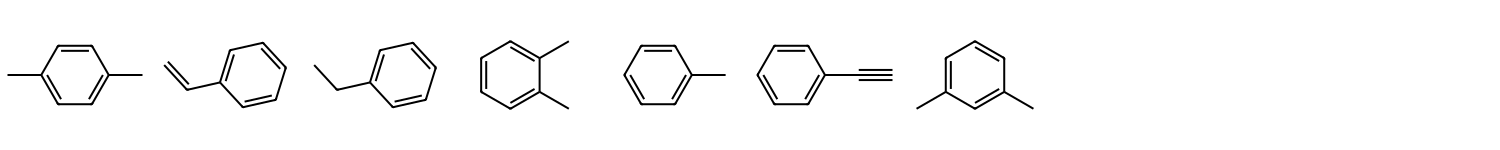

In [11]:
from rdkit import Chem
from rdkit.Chem import Draw
from itertools import combinations, product

def generate_benzene_derivatives_with_chains(n):
    benzene = Chem.MolFromSmiles('c1ccccc1')
    bond_types = [Chem.BondType.SINGLE, Chem.BondType.DOUBLE, Chem.BondType.TRIPLE]
    atom_indices = list(range(benzene.GetNumAtoms()))
    derivatives = set()

    for chain_length in range(1, n + 1):
        for num_chains in range(1, chain_length + 1):
            for positions in combinations(atom_indices, num_chains):
                for bonds in product(bond_types, repeat=chain_length):
                    mol = Chem.RWMol(benzene)
                    valid = True 
                    chain_atoms = []

                    for i, pos in enumerate(positions):
                        prev_atom_idx = pos
                        for j in range(chain_length // num_chains):
                            new_atom_idx = mol.AddAtom(Chem.Atom(6))
                            chain_atoms.append(new_atom_idx)
                            bond_type = bonds[i * (chain_length // num_chains) + j]

                          
                            if not can_add_bond(mol, prev_atom_idx, bond_type):
                                valid = False
                                break

                            mol.AddBond(prev_atom_idx, new_atom_idx, bond_type)
                            prev_atom_idx = new_atom_idx

                            
                            try:
                                mol.UpdatePropertyCache(strict=False)
                                if not is_valence_valid(mol):
                                    valid = False
                                    break
                            except ValueError:
                                valid = False
                                break

                        if not valid:
                            break

                    if valid:
                        smiles = Chem.MolToSmiles(mol, isomericSmiles=True)
                        derivatives.add(smiles)

    return [Chem.MolFromSmiles(smiles) for smiles in derivatives]

def can_add_bond(mol, atom_idx, bond_type):
    atom = mol.GetAtomWithIdx(atom_idx)
    current_valence = atom.GetExplicitValence()
    additional_valence = 1 if bond_type == Chem.BondType.SINGLE else 2 if bond_type == Chem.BondType.DOUBLE else 3
    return current_valence + additional_valence <= 4  

def is_valence_valid(mol):
    for atom in mol.GetAtoms():
        if atom.GetExplicitValence() > atom.GetTotalValence():
            return False
    return True

mols = generate_benzene_derivatives_with_chains(2)
Draw.MolsToGridImage(mols, molsPerRow=10, subImgSize=(150, 150))
